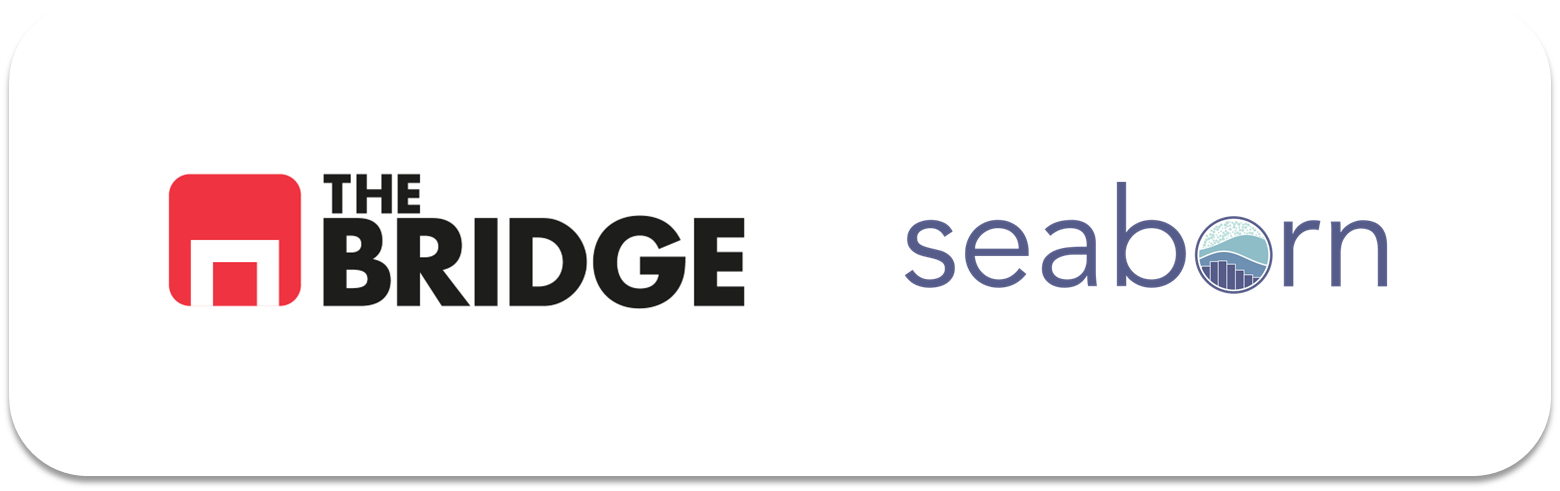

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd  # Para manipulación y análisis de datos
import matplotlib.pyplot as plt  # Para la visualización básica de gráficos
import seaborn as sns  # Para gráficos estilizados y avanzados
import numpy as np  # Para cálculos matemáticos y manejo de arrays

sns.set_theme(style='whitegrid')  


## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [ ]:
ruta = "data/california_cities.csv"  
data = pd.read_csv(ruta)

print("Primeras filas del dataset:")
print(data.head())

data_limpia = data.dropna()

print("\nCantidad de filas después de eliminar nulos:")
print(data_limpia.shape[0])

print("\nResumen de las columnas seleccionadas:")
print(data_limpia.info())

Primeras filas del dataset:
   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

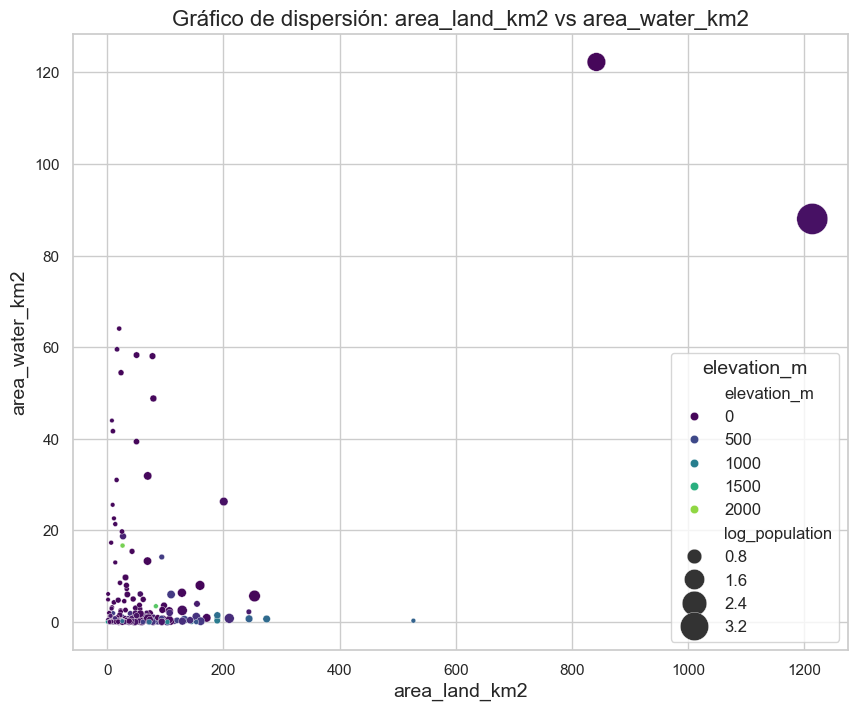

In [5]:
data = data.dropna()

def scatter_plot(dataframe, x_col, y_col, size_col=None, color_col=None, scale=1.0):
    """
    Crea un gráfico de dispersión con personalización de tamaño, color y escala.

    Args:
    - dataframe: El DataFrame que contiene los datos.
    - x_col: Nombre de la columna para el eje X.
    - y_col: Nombre de la columna para el eje Y.
    - size_col: (Opcional) Nombre de la columna para determinar el tamaño de los puntos.
    - color_col: (Opcional) Nombre de la columna para determinar el color de los puntos.
    - scale: (Opcional) Factor de escala para ajustar el tamaño de los puntos.
    """
    plt.figure(figsize=(10, 8))

    sns.scatterplot(
        data=dataframe,
        x=x_col,
        y=y_col,
        size=size_col,
        hue=color_col,
        sizes=(10, 500 * scale),  # Ajustar los tamaños de los puntos según la escala
        palette="viridis",
        legend="brief"
    )

    plt.title(f"Gráfico de dispersión: {x_col} vs {y_col}", fontsize=16)
    plt.xlabel(x_col, fontsize=14)
    plt.ylabel(y_col, fontsize=14)
    plt.legend(title=color_col or "Leyenda", fontsize=12, title_fontsize=14)
    plt.grid(True)
    plt.show()

data['log_population'] = data['population_total'].apply(lambda x: x / 1000000)

scatter_plot(
    dataframe=data,
    x_col="area_land_km2",  # Área de tierra en km² (eje X)
    y_col="area_water_km2",  # Área de agua en km² (eje Y)
    size_col="log_population",  # Tamaño basado en el logaritmo de la población
    color_col="elevation_m",  # Color basado en la elevación
    scale=1.0  # Ajustar escala de los puntos
)




### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

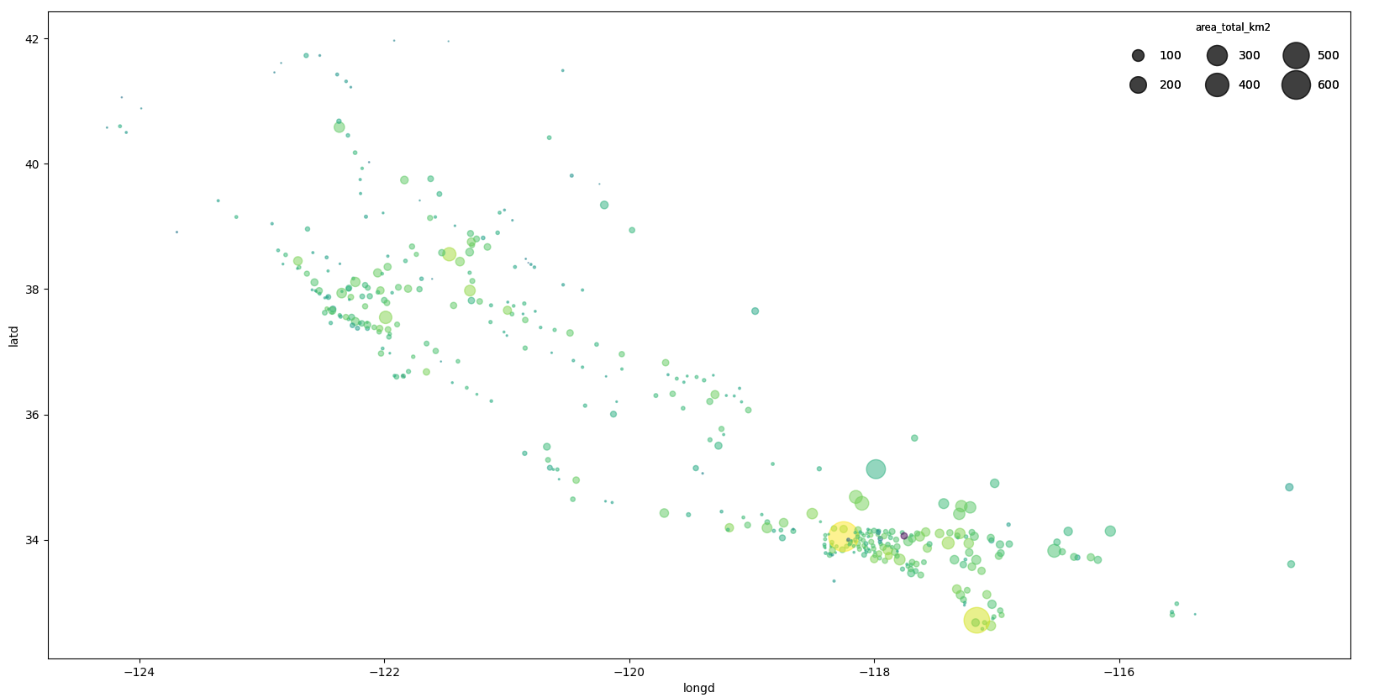

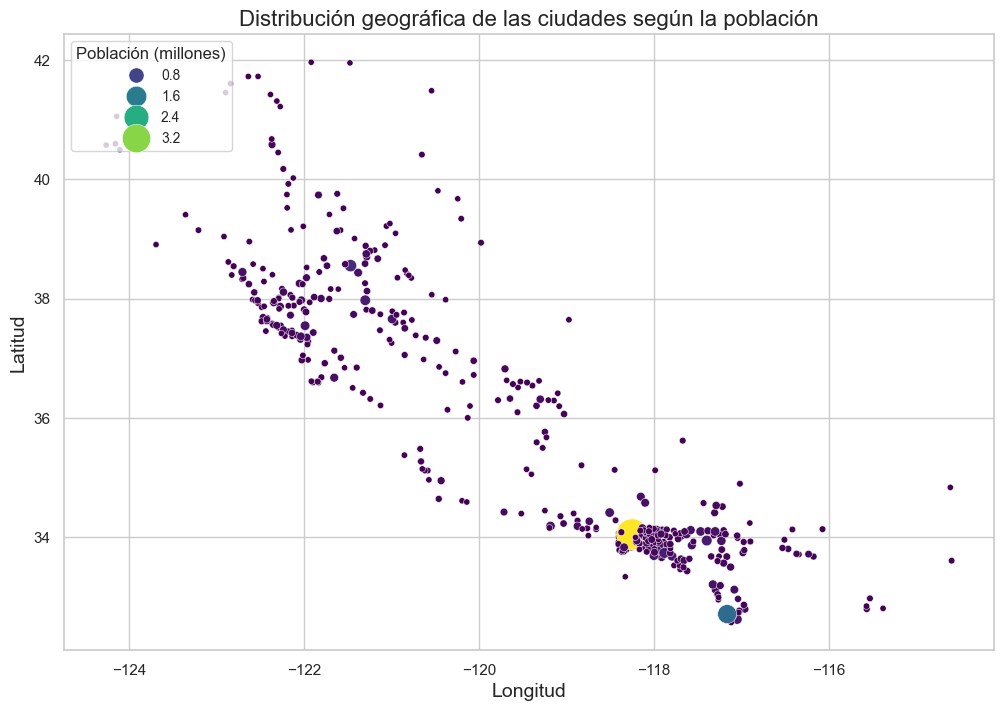

In [11]:
data = data.dropna()

data['log_population'] = data['population_total'].apply(lambda x: x / 1000000)  # Escala en millones

plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=data,
    x='longd',  # Longitud
    y='latd',  # Latitud
    size='log_population',  # Tamaño del punto según la población
    hue='log_population',  # Color del punto según la población
    palette='viridis',  # Paleta de colores
    sizes=(20, 500),  # Escala de tamaños de los puntos
    legend='brief'  # Mostrar leyenda
)

plt.title("Distribución geográfica de las ciudades según la población", fontsize=16)
plt.xlabel("Longitud", fontsize=14)
plt.ylabel("Latitud", fontsize=14)

legend = plt.legend(
    title="Población (millones)", 
    title_fontsize=12, 
    fontsize=10, 
    loc='upper left', 
    frameon=True
)

plt.show()


## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_theme(style="whitegrid")

In [ ]:
titanic_data = pd.read_csv("data/titanic.csv")  # Asegúrate de que el archivo esté en esta ruta

titanic_data = titanic_data.dropna()

C:\Users\Jesus\AppData\Local\Temp\ipykernel_18484\1654624016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


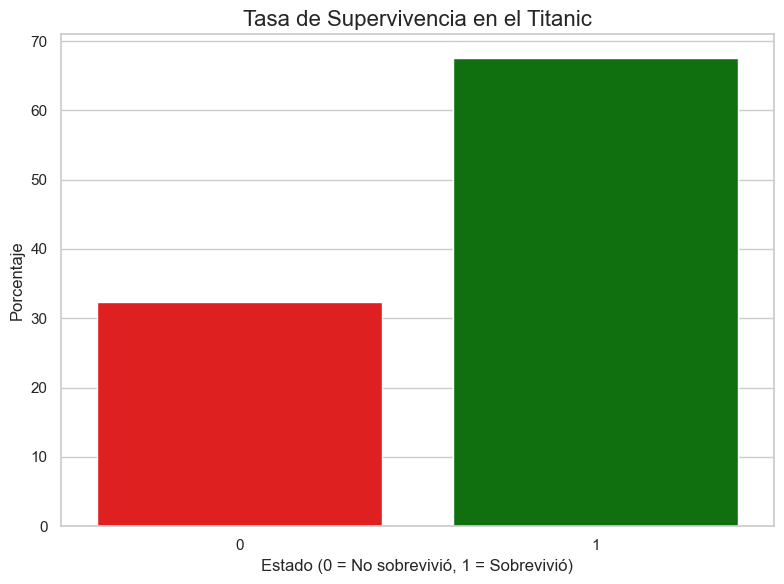

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x=titanic_data["survived"].value_counts().index,
    y=titanic_data["survived"].value_counts(normalize=True) * 100,
    palette=["red", "green"]
)
plt.title("Tasa de Supervivencia en el Titanic", fontsize=16)
plt.ylabel("Porcentaje", fontsize=12)
plt.xlabel("Estado (0 = No sobrevivió, 1 = Sobrevivió)", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Jesus\AppData\Local\Temp\ipykernel_18484\2450352360.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


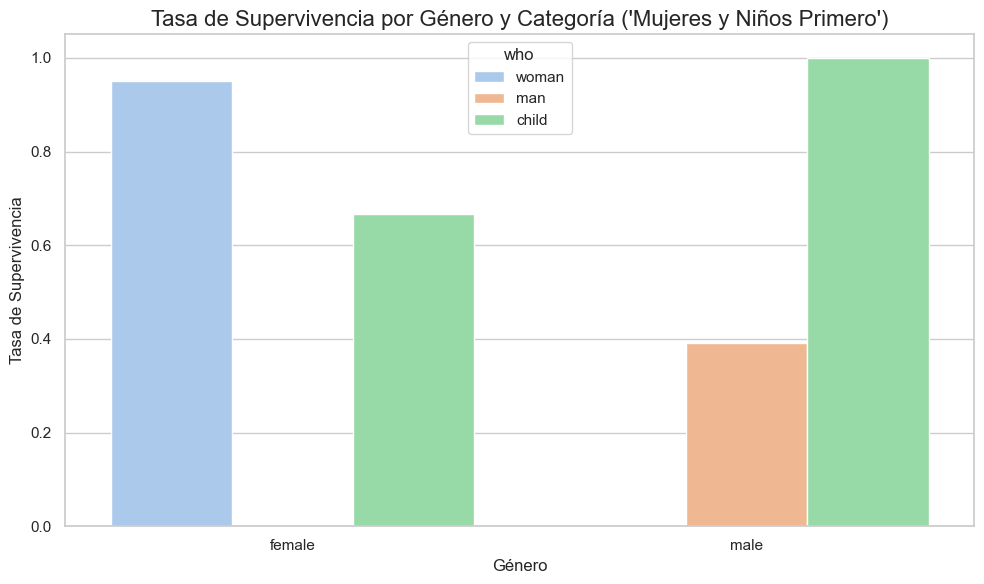

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=titanic_data,
    x="sex",
    y="survived",
    hue="who",
    ci=None,
    palette="pastel"
)
plt.title("Tasa de Supervivencia por Género y Categoría ('Mujeres y Niños Primero')", fontsize=16)
plt.ylabel("Tasa de Supervivencia", fontsize=12)
plt.xlabel("Género", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Jesus\AppData\Local\Temp\ipykernel_18484\2626392702.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


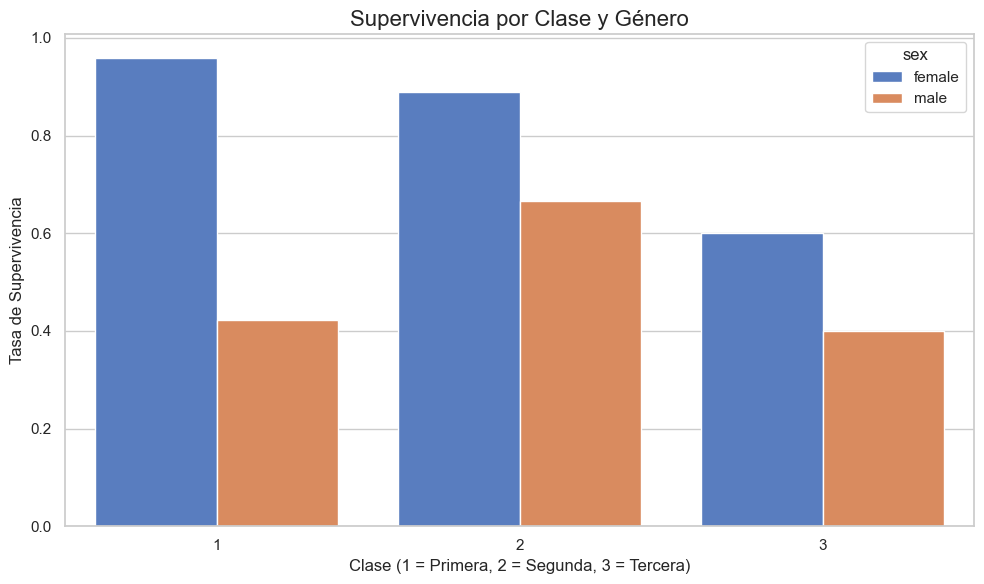

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=titanic_data,
    x="pclass",
    y="survived",
    hue="sex",
    ci=None,
    palette="muted"
)
plt.title("Supervivencia por Clase y Género", fontsize=16)
plt.ylabel("Tasa de Supervivencia", fontsize=12)
plt.xlabel("Clase (1 = Primera, 2 = Segunda, 3 = Tercera)", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Jesus\AppData\Local\Temp\ipykernel_18484\2967602404.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


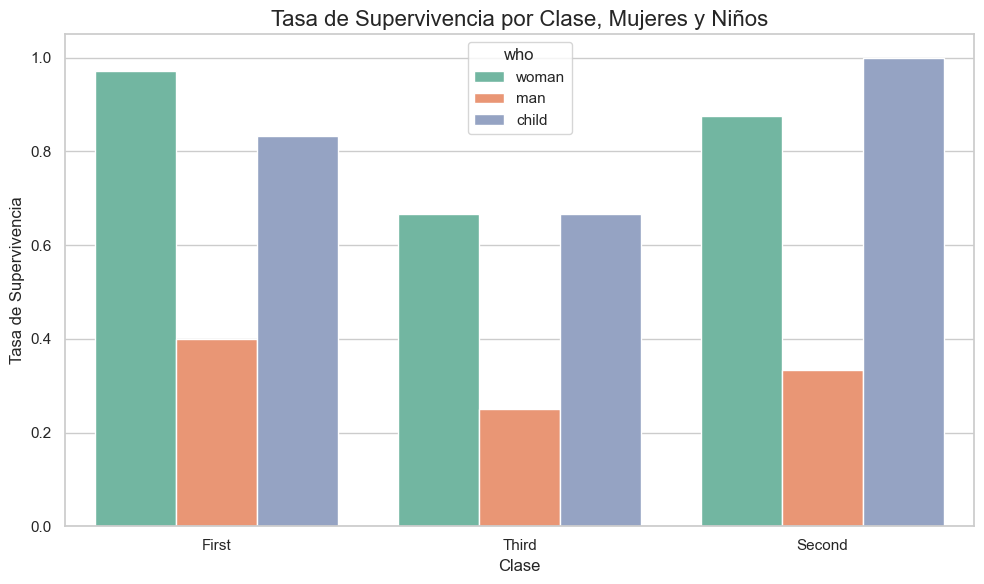

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=titanic_data,
    x="class",
    y="survived",
    hue="who",
    ci=None,
    palette="Set2"
)
plt.title("Tasa de Supervivencia por Clase, Mujeres y Niños", fontsize=16)
plt.ylabel("Tasa de Supervivencia", fontsize=12)
plt.xlabel("Clase", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Jesus\AppData\Local\Temp\ipykernel_18484\2272317899.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


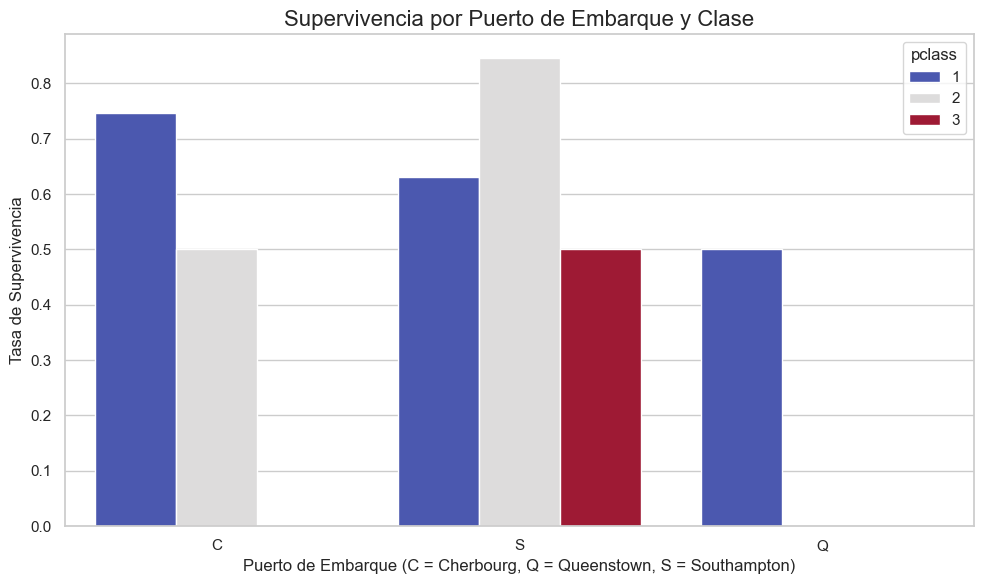

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=titanic_data,
    x="embarked",
    y="survived",
    hue="pclass",
    ci=None,
    palette="coolwarm"
)
plt.title("Supervivencia por Puerto de Embarque y Clase", fontsize=16)
plt.ylabel("Tasa de Supervivencia", fontsize=12)
plt.xlabel("Puerto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)", fontsize=12)
plt.tight_layout()
plt.show()